This notebook provides some examples of visualizations made with FracMan outputs, outside of the normal FracMan capabilities. Many of these visualizations are geospatial and require Geopandas. The best (and by far easier) way to install Geopandas is using Miniconda.

https://docs.conda.io/en/latest/miniconda.html



In [1]:
from pathlib import Path
from typing import Tuple

import geopandas as gpd
import pandas as pd
import numpy as np
from sklearn import linear_model
from shapely.geometry import LineString

from pyfracman.data import clean_columns
from pyfracman.fab import parse_fab_file
from pyfracman.frac_geo import flatten_frac, get_mid_z
from pyfracman.well_geo import (
    load_stage_location,
    load_survey_export, 
    well_surveys_to_linestrings, 
    stage_locs_to_gdf
    )

In [2]:
data_dir = Path(r"C:\Users\scott.mckean\Desktop\spider_plots")

In [48]:
### Load fractures ###
frac_fpath = next(data_dir.rglob("Well_Connected_Fracs_1.fab"))
fracs = parse_fab_file(frac_fpath)

# load fracture properties
prop_df = pd.DataFrame(fracs['prop_list'], columns = fracs['prop_dict'].values(), index=fracs['fid'])
prop_df.index.set_names('fid', inplace=True)

# load fracture geometry and flatten to 2D at midpoint of frac plane
frac_linestrings = list(map(flatten_frac, fracs['fracs']))
frac_mid_z = list(map(get_mid_z, fracs['fracs']))
frac_gdf = gpd.GeoDataFrame(prop_df, geometry=frac_linestrings)

In [49]:
### load stages and surveys ###
# load surveys and convert to linestrings
surveys = pd.concat(
    [load_survey_export(well_path) for well_path in data_dir.glob("*_well.txt")]
)
survey_linestrings = well_surveys_to_linestrings(surveys)

# load stage locations and convert to GDF with points and linestring
stage_locs = pd.concat(
    [load_stage_location(well_path) for well_path in data_dir.glob("*_intervals.txt")]
)
stage_gdf = stage_locs_to_gdf(stage_locs)

In [47]:
def get_fracture_set_stats(fpath: Path, set_name: str, set_alias: str) -> pd.DataFrame:
    """Parse a connection export from FracMan to get the Fracture set statistics

    Args:
        fpath (Path): file path
        set_name (str): name of fracture set to summarize

    Returns:
        pd.DataFrame: Dataframe with statistics
    """
    conn = pd.read_csv(fpath, delim_whitespace=True).rename(columns={"Set_Name":"FractureSet"})
    conn.columns = clean_columns(conn.columns)
    
    # get set ids
    set_ids = conn.query("fractureset == @set_name").groupby('object')['fracid'].apply(list)
    set_ids.name = set_alias + "_ids"

    # get set counts
    set_ct = conn.query("fractureset == @set_name").groupby('object').count().iloc[:,0]
    set_ct.name = set_alias + "_count"

    # get stage counts
    stages = conn.groupby("object").count().reset_index().rename(columns={'FractureSet':'interactions'})
    stages['stage_no'] = stages.object.str.split("_").str[-1]
    stages['well'] = stages.object.str.split("_").str[-3]
    stages = (stages[['stage_no','well','object']]
        .merge(set_ids, left_on='object', right_index=True)
        .merge(set_ct, left_on='object', right_index=True)
        )

In [46]:
### load results ###
stage_dfs = []
for conn_fpath in data_dir.rglob("*_Connections.txt"):
    

In [54]:
conn.query("object == 'StageConnection_A6_Stage_1'")

,object,fracid,fractureradius,fractureset,fracturex,fracturey,fracturez
0,StageConnection_A6_Stage_1,7,-9999,A4_fracs_1,1427.29,-485.410,-206.363
1,StageConnection_A6_Stage_1,6,-9999,A4_fracs_1,1467.81,-505.810,-205.824
2,StageConnection_A6_Stage_1,5,-9999,A4_fracs_1,1427.66,-485.610,-206.357
3,StageConnection_A6_Stage_1,4,-9999,A4_fracs_1,1478.21,-511.010,-205.755
4,StageConnection_A6_Stage_1,3,-9999,A4_fracs_1,1520.32,-531.610,-205.318
5,StageConnection_A6_Stage_1,2,-9999,A4_fracs_1,1427.66,-485.610,-206.357
6,StageConnection_A6_Stage_1,1,-9999,A4_fracs_1,1478.21,-511.010,-205.755
7,StageConnection_A6_Stage_1,0,-9999,A4_fracs_1,1520.32,-531.610,-205.318
8,StageConnection_A6_Stage_1,11,-9999,A6_fracs_1,1211.87,-722.110,-209.038
9,StageConnection_A6_Stage_1,10,-9999,A6_fracs_1,1239.42,-735.810,-208.734


In [52]:
stages

,stage_no,well,object,set_a_count,set_a_ids,set_b_count,set_b_ids
0,1,A6,StageConnection_A6_Stage_1,10,"[526, 439, 263, 256, 254, 242, 206, 203, 118, ...",11,"[442, 311, 309, 286, 240, 167, 104, 62, 61, 21..."
1,10,A6,StageConnection_A6_Stage_10,10,"[526, 439, 263, 256, 254, 242, 206, 203, 118, ...",11,"[442, 311, 309, 286, 240, 167, 104, 62, 61, 21..."
2,11,A6,StageConnection_A6_Stage_11,10,"[526, 439, 263, 256, 254, 242, 206, 203, 118, ...",11,"[442, 311, 309, 286, 240, 167, 104, 62, 61, 21..."
3,12,A6,StageConnection_A6_Stage_12,4,"[513, 407, 303, 253]",4,"[509, 467, 245, 90]"
4,13,A6,StageConnection_A6_Stage_13,4,"[513, 407, 303, 253]",4,"[509, 467, 245, 90]"
5,14,A6,StageConnection_A6_Stage_14,4,"[513, 407, 303, 253]",4,"[509, 467, 245, 90]"
6,15,A6,StageConnection_A6_Stage_15,4,"[513, 407, 303, 253]",4,"[509, 467, 245, 90]"
7,16,A6,StageConnection_A6_Stage_16,4,"[513, 407, 303, 253]",4,"[509, 467, 245, 90]"
8,17,A6,StageConnection_A6_Stage_17,4,"[513, 407, 303, 253]",4,"[509, 467, 245, 90]"
9,18,A6,StageConnection_A6_Stage_18,4,"[513, 407, 303, 253]",4,"[509, 467, 245, 90]"


In [39]:
set_a_ids

object
StageConnection_A6_Stage_1     [526, 439, 263, 256, 254, 242, 206, 203, 118, ...
StageConnection_A6_Stage_10    [526, 439, 263, 256, 254, 242, 206, 203, 118, ...
StageConnection_A6_Stage_11    [526, 439, 263, 256, 254, 242, 206, 203, 118, ...
StageConnection_A6_Stage_12                                 [513, 407, 303, 253]
StageConnection_A6_Stage_13                                 [513, 407, 303, 253]
StageConnection_A6_Stage_14                                 [513, 407, 303, 253]
StageConnection_A6_Stage_15                                 [513, 407, 303, 253]
StageConnection_A6_Stage_16                                 [513, 407, 303, 253]
StageConnection_A6_Stage_17                                 [513, 407, 303, 253]
StageConnection_A6_Stage_18                                 [513, 407, 303, 253]
StageConnection_A6_Stage_19                                 [513, 407, 303, 253]
StageConnection_A6_Stage_2     [526, 439, 263, 256, 254, 242, 206, 203, 118, ...
StageConnection_A6_St

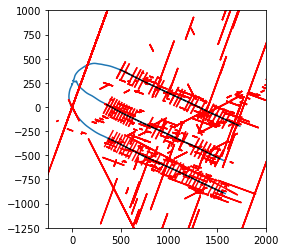

In [51]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
survey_linestrings.plot(ax = ax)
frac_gdf.plot(ax = ax, color='r')
stage_gdf.set_geometry('stg_line').plot(ax = ax, color='k')
ax.set_aspect('equal')
plt.xlim(-250, 2000)
plt.ylim(-1250, 1000)
plt.show()

In [43]:
# Load results
# Make plot
# Make spider plot
# Redo histograms

,fid,Permeability,Compressibility,Aperture,Fracture Geometry,Set_Name,Distance2Well,FractureLength,FractureHeight
0,1,316.282,0.001,8.88898e-05,0,2,1050.94,133.881,25.6777
1,2,272.134,0.001,6.06439e-06,0,2,115.15,760.581,1.24458
2,3,170,0.001,0.000242713,0,2,95.5852,157.658,6.44753
3,4,96.7057,0.001,3.09983e-05,0,2,78.2191,603.266,150
4,5,45.888,0.001,0.000165139,0,2,96.9793,522.846,130.571
5,6,68.1896,0.001,8.44618e-05,0,2,222.504,131.829,0.472229
6,7,67.9948,0.001,0.0001401,0,2,66.556,205.753,18.1062
7,8,108.712,0.001,4.75716e-05,0,2,172.019,928.504,150
8,9,61.0575,0.001,8.47773e-05,0,2,319.864,264.671,6.03465
9,10,182.468,0.001,0.0001157,0,2,146.669,141.707,84.3213
